## Caffeine present in various substances


### Motivation: Reddit r/dataisbeautiful, July Battle
[Thread](https://www.reddit.com/r/dataisbeautiful/comments/c89mz2/battle_dataviz_battle_for_the_month_of_july_2019/)

### Dataset 
[Caffeine table](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4462044/table/T2/?report=objectonly)

The dataset contains three colunms and there is no description of what this columns are supposed to contain, but we can describe them as:  
'Servings per day' - Contains either a category name and a serving value or just a category name;  
'Item' - Contains the item name;  
'Total Caffeine (in mg)' - Contains the caffeine value in mg or a proportion of the caffeine in those items;  

### Cleaning

Added a colunm called 'Caffeine (mg)' which contains the only value of 'Total Caffeine (in mg)

Added a colunm 'Serving (ml)' which contains the value of ml from 'Servings per day' or 'Total Caffeine (in mg)'

#### Category

Servings per day contains a category, but those categories don't seem so good in describing the items.
I createad another columns 'Category' in which I copied the values of servings per day as above:

Separated in two categories  
Coffee (180 ml cup) - Coffee; Decaf  
  
'Starbucks Tall Coffee' and 'Biggby Iced Coffee' were reclassified as Coffee.

Energy drinks  
This may not be the best way to describe this category since it contained some concentrates, so it was renamed.  
Energy drinks - Energy Drinks and concentrates  

Renamed  
'Small candy bar' - Candy  
Added 'Baking chocolate' to Candy since it's not a drink 
  
Renamed  
'Medications (per tablet)' - Med  

### Serving Size

Items in the category 'Energy Drinks and Concentrates' didn't had any description of the serving size, so their caffeine values didn't had much meaning. 

We can't compare a shot of expresso to a liter of energy drink by just looking at the total caffeine in those products, we need the total volume so then we cn compare proportions.

I did some research and looked up some of the sizes of this products.
My methodology to do it was:

1 - Search for a source that contained both the caffeine amount and the total size of the product, if the caffeine was the same as listed in this dataset I registered it.

2 - If the caffeine wasn't found or didn't match the registered value,
I searched for the product at their manufacturer website an tried to get the most common size.

3 - If the manufacturer website wasn't found or the information wasn't there, I used other sources(review, article, catalogue)

Sources:

[28](https://www.drink28.com/products/id-28-black.html)  
[6 hour power](https://www.caffeineinformer.com/caffeine-content/6-hour-power)  
[bang](https://bang-energy.com/product/bang-12-pack/)  
[biggby coffee](https://www.caffeineinformer.com/caffeine-content/biggby-coffee)  
[chameleon cold brew](https://www.chameleoncoldbrew.com/blog/mixing-the-perfect-cup-of-cold-brew-concentrate/), [[more]](https://www.standard.net/lethal-doses-of-caffeine-drinks-explained/article_99fe3f76-4ffb-5c49-9e25-3515f1fd77a9.html)  
[cocaine](https://www.caffeineinformer.com/caffeine-content/cocaine-energy-drink)  
[diablo](https://www.caffeineinformer.com/caffeine-content/diablo-energy-drink)  
[guayaki](http://www.ekbeverage.com/file-download.asp?FileID=16)  
[hardcore](https://www.caffeineinformer.com/caffeine-content/hardcore-energize-bullet)  
[java](https://www.caffeineinformer.com/caffeine-content/java-monster)  
[lightning](https://www.caffeineinformer.com/caffeine-content/new-liquid-lightning-energy-drink)  
[monster](https://www.caffeineinformer.com/caffeine-content/mega-monster-energy-drink) - 16oz size  
[neuro fuel](https://www.caffeineinformer.com/caffeine-content/neuro-fuel-energy-drink)  
[octane](https://www.caffeineinformer.com/caffeine-content/octane-energy-drink)  
[potencia](https://www.caffeineinformer.com/caffeine-content/potencia)  
[rage inferno](https://www.caffeineinformer.com/rage-inferno-energy-drink-review) - Discontinued product, apparently was sold in 24oz bottles  
[red bull](https://www.caffeineinformer.com/caffeine-content/red-bull)  
[speed fuel](https://www.caffeineinformer.com/caffeine-content/speed-fuel-energy-drink-robby-gordon)  
[starbucks tall](https://customerservice.starbucks.com/app/answers/detail/a_id/3113/~/what-are-the-sizes-of-starbucks-drinks%3F)  
[ubermonster](https://www.caffeineinformer.com/caffeine-content/ubermonster) - 160mg/16oz  
[venom black mamba](https://www.dpsgproductfacts.com/product/VENOM_BLACK_MAMBA_ENERGY_DRINK_16)  
[Zun](https://www.caffeineinformer.com/discontinued-drinks) - Discontinued product  

*Exception:   
Caffeine Energy Drink - Not found, used the mode/median of energy drink sizes

16oz, 473ml


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv('caf.csv')

matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=['#E4BB97', '#A2FAA3', '#D7D7D7', '#2C3B5E', 
                                           '#6E6E6E', '#774F2E', '#D69D00', '#000000'])

In [2]:
df.head()

,Servings per day,Item,Total Caffeine (in mg),Caffeine (mg),Serving (ml),Category
0,Coffee (180 ml cup),Drip brewed,100 mg per 180 ml,100,180.0,Coffee
1,Coffee (180 ml cup),Percolated,120 mg per 180 ml,120,180.0,Coffee
2,Coffee (180 ml cup),Instant,90 mg. per 180 ml,90,180.0,Coffee
3,Coffee (180 ml cup),Brewed decaffeinated,5 mg per 180 ml,5,180.0,Decaf
4,Coffee (180 ml cup),Instant decaffeinated,3 mg per 180 ml,3,180.0,Decaf


Let's get a look at the categories

In [3]:
df['proportion'] = df['Caffeine (mg)']/df['Serving (ml)']
df.groupby('Category').describe()

Caffeine (mg)                                \
                                       count        mean         std   min   
Category                                                                     
Candy                                    2.0   30.000000    7.071068  25.0   
Chocolate                                1.0    6.000000         NaN   6.0   
Cocoa                                    1.0   13.000000         NaN  13.0   
Coffee                                   5.0  152.400000   72.172017  90.0   
Decaf                                    2.0    4.000000    1.414214   3.0   
Energy drinks and Concentrates          21.0  280.428571  438.949265  80.0   
Med                                      8.0   78.625000   79.456974  16.0   
Soft Drinks                              7.0   49.285714   11.629192  40.0   
Tea                                      3.0   46.666667   20.207259  35.0   

                                                            Serving (ml)  \
                                  25%    50%    75%     max        count   
Category                                                                   
Candy                            27.5   30.0   32.5    35.0          0.0   
Chocolate                         6.0    6.0    6.0     6.0          1.0   
Cocoa                            13.0   13.0   13.0    13.0          1.0   
Coffee                          100.0  120.0  192.0   260.0          5.0   
Decaf                             3.5    4.0    4.5     5.0          2.0   
Energy drinks and Concentrates  128.0  160.0  250.0  2160.0         21.0   
Med                              28.0   32.5  125.0   200.0          0.0   
Soft Drinks                      40.5   45.0   53.5    72.0          7.0   
Tea                              35.0   35.0   52.5    70.0          3.0   

                                            ...               proportion  \
                                      mean  ...    75%    max      count   
Category                                    ...                            
Candy                                  NaN  ...    NaN    NaN        0.0   
Chocolate                        30.000000  ...   30.0   30.0        1.0   
Cocoa                           180.000000  ...  180.0  180.0        1.0   
Coffee                          273.600000  ...  355.0  473.0        5.0   
Decaf                           180.000000  ...  180.0  180.0        2.0   
Energy drinks and Concentrates  407.571429  ...  473.0  946.0       21.0   
Med                                    NaN  ...    NaN    NaN        0.0   
Soft Drinks                     360.000000  ...  360.0  360.0        7.0   
Tea                             180.000000  ...  180.0  180.0        3.0   

                                                                        \
                                    mean       std       min       25%   
Category                                                                 
Candy                                NaN       NaN       NaN       NaN   
Chocolate                       0.200000       NaN  0.200000  0.200000   
Cocoa                           0.072222       NaN  0.072222  0.072222   
Coffee                          0.572107  0.130120  0.405920  0.500000   
Decaf                           0.022222  0.007857  0.016667  0.019444   
Energy drinks and Concentrates  0.761261  0.843841  0.282486  0.338266   
Med                                  NaN       NaN       NaN       NaN   
Soft Drinks                     0.136905  0.032303  0.111111  0.112500   
Tea                             0.259259  0.112263  0.194444  0.194444   

                                                              
                                     50%       75%       max  
Category                                                      
Candy                                NaN       NaN       NaN  
Chocolate                       0.200000  0.200000  0.200000  
Cocoa                           0.072222  0.072222  0.072222  
C

### Proportions

One way of analysing this beverages caffeine is by comparing the proportions it contain, as mentioned before, using the total amount of caffeine might be misleading because the servings are not the same for all those products.

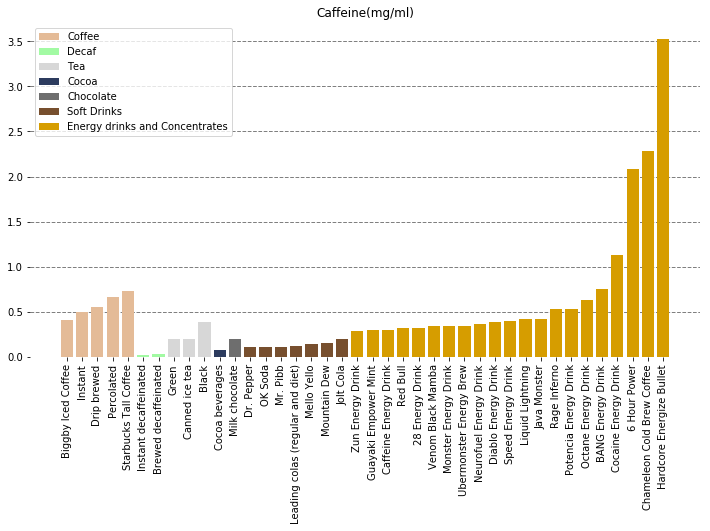

In [4]:
df_prop = df.dropna(subset=['Serving (ml)']).copy()

fig, ax = plt.subplots(1,figsize=(12,8))
for cat in df_prop['Category'].unique():
    df_temp = df[df['Category']==cat].copy()
    df_temp.sort_values(by='proportion', inplace=True)
    plt.bar(df_temp['Item'],df_temp['proportion'])

plt.title('Caffeine(mg/ml)')
plt.xticks(df_prop['Item'],rotation=90)
plt.legend(df_prop['Category'].unique())

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(color='gray', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('1.png', edgecolor='none')

By analysing the above chart we can see that it need some improvements, some sorting would help compare the values and there's a clear difference between the energy drinks and the concentrates, the highest three values are all concentrates, maybe I should slip this category into two.

In [5]:
df.loc[df['Category'] == 'Energy drinks and Concentrates', 'Category'] = 'Energy Drinks'
df.loc[df['Item'] == '6 Hour Power', 'Category'] = 'Concentrates'
df.loc[df['Item'] == 'Chameleon Cold Brew Coffee', 'Category'] = 'Concentrates'
df.loc[df['Item'] == 'Hardcore Energize Bullet', 'Category'] = 'Concentrates'

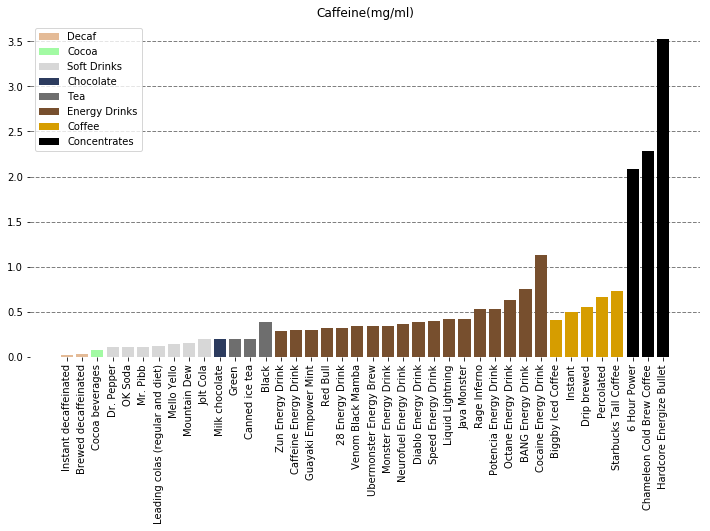

In [6]:
# data frame to hold only records that have a proportion
df_prop = df.dropna(subset=['Serving (ml)']).copy()

# Sort categories by their mean
categories = df_prop.groupby('Category').describe()
categories = categories.sort_values(by=('proportion','mean')).index

# plot
fig, ax = plt.subplots(1,figsize=(12,8))
for cat in categories:
    df_temp = df[df['Category']==cat].copy()
    df_temp.sort_values(by='proportion', inplace=True)
    plt.bar(df_temp['Item'],df_temp['proportion'])

# adjust graph
plt.title('Caffeine(mg/ml)')
plt.xticks(df_prop['Item'],rotation=90)
plt.legend(categories)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(color='gray', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('2.png', edgecolor='none')

The above chart categories are sorted by their mean proportion, while the items are sorted by their actual proportions.  
  
### Insights and Findings
  
1- Decafs have the least concentration of caffeine, followed by cocoa beverages.  
2- Soft drinks have a similar proportion, but 'Jolt Cola' has a considerably higher amount than the rest;  
3- Surprisingly (at least for me), Milk chocolate have a higher concentration of caffeine than most soft drinks;  
4- Black tea proportion is very high compared to the previous values, even higher than some energy drinks;  
5- Energy drinks have a big range with items all around it, many of them bellow 0.5 but some reaching more than 1.0;  
6- In average coffee have a higher proportion of caffeine than energy drinks, the two reclassified items (Biggby and Starbucks) seem to fit well in this category;  
7- As expected the concentrates have a very high proportion, and this made me think if this really is the best interpretation of those values;  

#### Proportion cons

As observed in the previous chart concentrates had the highest proportions, but this is almost commonsense right?
The reason for that is the essence of the product, it was made in a concentrated format so people can either mix it with other beverages or consume it in a single shot. In other words, this products are marketed to people that want to consume lots of caffeine in a short amount of time.

So it's not really right to compare the proportions of those products without checking the servings again, it's likelly that some people may drink a liter of 'Monster' per day since this is not much more than 2 cans, but drinking a liter of '6 hour power' would mean more than 15 units of it.

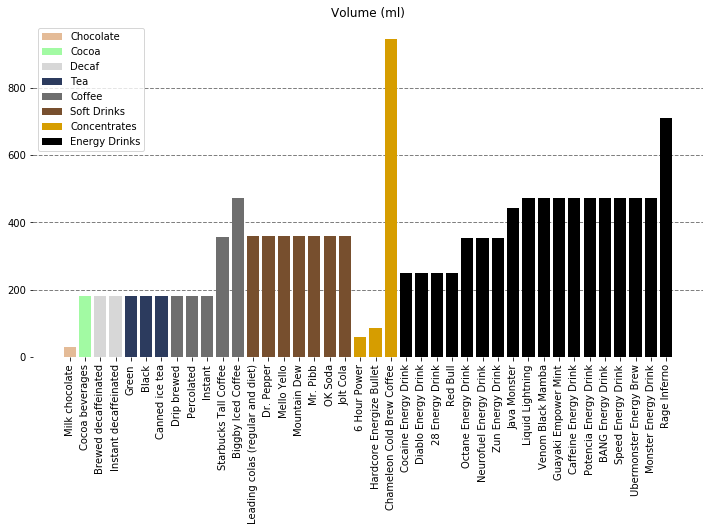

In [7]:
# data frame to hold only records that have a proportion
df_prop = df.dropna(subset=['Serving (ml)']).copy()

# Sort categories by their mean
categories = df_prop.groupby('Category').describe()
categories = categories.sort_values(by=('Serving (ml)','mean')).index

# plot
fig, ax = plt.subplots(1,figsize=(12,8))
for cat in categories:
    df_temp = df[df['Category']==cat].copy()
    df_temp.sort_values(by='Serving (ml)', inplace=True)
    plt.bar(df_temp['Item'],df_temp['Serving (ml)'])

# adjust graph
plt.title('Volume (ml)')
plt.xticks(df_prop['Item'],rotation=90)
plt.legend(categories)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(color='gray', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('3.png', edgecolor='none')

### Too small
Milk chocolate has a too small volume, the volume in the dataset is 60ml which is not really a serving size, it can be adjusted to have 250 ml, which is a standard unit for a cup. [Cup (unit) - Metric cup](https://en.wikipedia.org/wiki/Cup_(unit))  
6 hour power and hardcore energize bullet also have a small volume but they are supposed to be consumed this way. Although some people may mix them with other products this volume represents one serving.  
  
### Too big
Chameleon Cold Brew Coffee has a too big volume,  according to the their [website](https://www.chameleoncoldbrew.com/blog/mixing-the-perfect-cup-of-cold-brew-concentrate/), this concentrate should acctually be used in 4oz (118ml) doses and mixed with other ingredients such as milk, water, ice.

Rage inferno has a too big volume, after some google search I found that it comes in a bottle, so the total volume is not really the correct measure of a serving. It can also be adjusted to have 250 ml, which is a standard unit for a cup. [Cup (unit) - Metric cup](https://en.wikipedia.org/wiki/Cup_(unit))  

In [8]:
df['Adjusted serving'] = df['Serving (ml)']

df.loc[df['Item'] == 'Milk chocolate', 'Adjusted serving'] = 250
df.loc[df['Item'] == 'Rage Inferno', 'Adjusted serving'] = 250
df.loc[df['Item'] == 'Chameleon Cold Brew Coffee', 'Adjusted serving'] = 118

df['Caffeine per serving (mg)'] = df['Adjusted serving']*df['proportion']

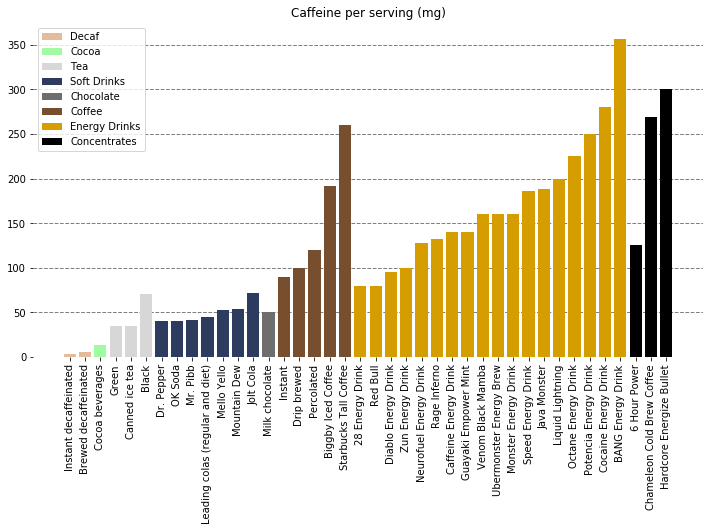

In [9]:
# data frame to hold only records that have a proportion
df_prop = df.dropna(subset=['Caffeine per serving (mg)']).copy()

# Sort categories by their mean
categories = df_prop.groupby('Category').describe()
categories = categories.sort_values(by=('Caffeine per serving (mg)','mean')).index

# plot
fig, ax = plt.subplots(1,figsize=(12,8))
for cat in categories:
    df_temp = df[df['Category']==cat].copy()
    df_temp.sort_values(by='Caffeine per serving (mg)', inplace=True)
    plt.bar(df_temp['Item'],df_temp['Caffeine per serving (mg)'])

# adjust graph
plt.title('Caffeine per serving (mg)')
plt.xticks(df_prop['Item'],rotation=90)
plt.legend(categories)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(color='gray', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('4.png', edgecolor='none')

### Analysis
Now the data has been cleaned, the categories properlly defined and we can start asking questions and comparing the values.

I want to know how much of those you can drink without comprommising your health.

#### How much is too much?

Lets start visualizing the 'Caffeine (mg/ml)' again, but this time with the values sorted by item instead of by category. 

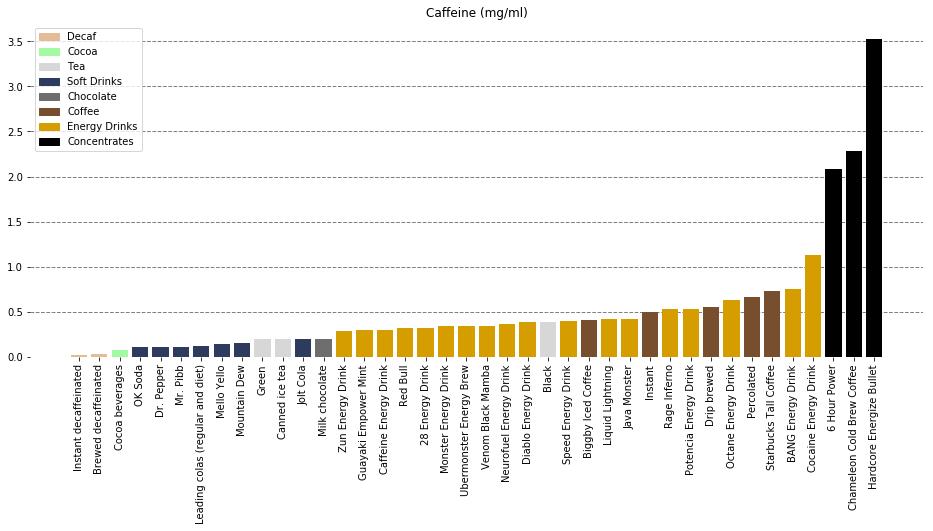

In [10]:
df_prop = df.dropna(subset=['Caffeine per serving (mg)']).copy()
df_prop.sort_values(by='proportion', inplace=True)

colr_dic = {'Decaf' :'#E4BB97', 'Cocoa':'#A2FAA3', 'Tea':'#D7D7D7', 'Soft Drinks': '#2C3B5E', 'Chocolate': '#6E6E6E',
            'Coffee': '#774F2E','Energy Drinks':'#D69D00', 'Concentrates': '#000000'}

fig, ax = plt.subplots(1,figsize=(16,8))

color=[colr_dic[row.Category] for i, row in df_prop.iterrows()]

plt.bar(df_prop['Item'],df_prop['proportion'], color=color)
plt.title('Caffeine (mg/ml)')
plt.xticks(df_prop['Item'],rotation=90)
handles = [matplotlib.patches.Patch(color=colr_dic[x], label=x) for x in colr_dic.keys()]
plt.legend(handles=handles)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(color='gray', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('5.png', edgecolor='none')

According to the proportion of caffeine in those products the concentrates should be the ones we need to watch out for, but as presented in the cleaning process the proportion have some cons and comparing the products by the concentration of caffeine isn't always reallystic.
Now let's see what the acctual amount of caffeine per servings is and compare to the previous visualization.

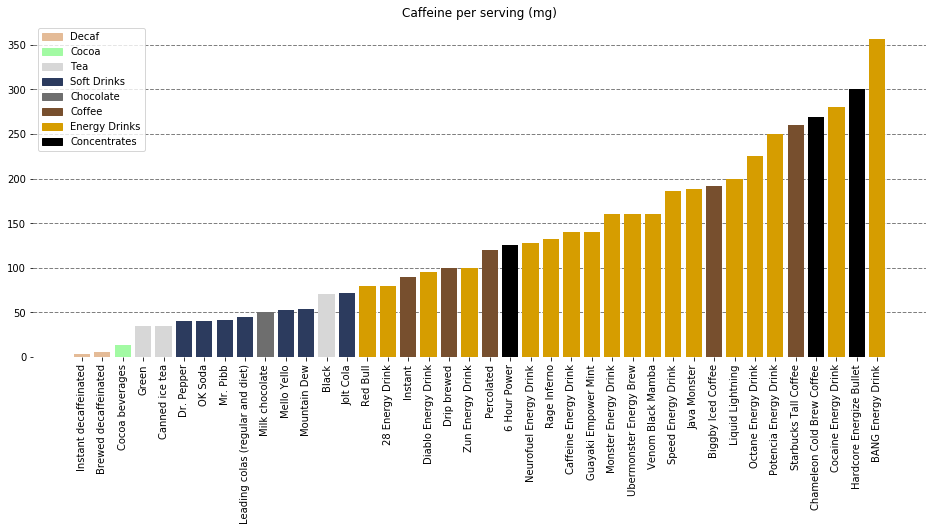

In [11]:
df_prop = df.dropna(subset=['Caffeine per serving (mg)']).copy()
df_prop.sort_values(by='Caffeine per serving (mg)', inplace=True)

colr_dic = {'Decaf' :'#E4BB97', 'Cocoa':'#A2FAA3', 'Tea':'#D7D7D7', 'Soft Drinks': '#2C3B5E', 'Chocolate': '#6E6E6E',
            'Coffee': '#774F2E','Energy Drinks':'#D69D00', 'Concentrates': '#000000'}

fig, ax = plt.subplots(1,figsize=(16,8))

color=[colr_dic[row.Category] for i, row in df_prop.iterrows()]
color
plt.bar(df_prop['Item'],df_prop['Caffeine per serving (mg)'], color=color)
plt.title('Caffeine per serving (mg)')
plt.xticks(df_prop['Item'],rotation=90)
handles = [matplotlib.patches.Patch(color=colr_dic[x], label=x) for x in colr_dic.keys()]
plt.legend(handles=handles)

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.grid(color='gray', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('6.png', edgecolor='none')

There are big differences in those visualizations, concentrates that were way higher than any other category are not so high anymore, most of them are still in the top 5 but now the beverage with highest amount of caffeine is an energy drink. 
  
Coffees were ahead of most energy drinks in the previous visualization, now there's a clear difference between the branded coffees and the regular ones. Biggby had the lowest concentration amoung the coffees but now it's on the top 10 of all beverages while Instant, Drip brewed and Percolated are with the lowest energy drinks.  
  
Black tea was also very affected by this comparison, in the previous chart it was higher than energy drinks such as Monster, Ubermonster and Venom, but those drinks come in big cans while a tea serving is a cup so even tought the concentration is higher in black tea drinking a cup of it has way less caffeine than drinking a can of those energy drinks.

* According to [Caffeine Informer](https://www.caffeineinformer.com/caffeine-content/bang-energy-drink), BANG energy drink originally had 357 mg of caffeine but has decreased it to 300 mg.

### Which visualization is better?

We can't say any of them is better, both have value in answering the question 'How much is too much?'.  

For example, let's say you want to know how is your caffeine intake based on this two imaginary scenarios:

* Every day at the office you drink two cups of coffee, but some days you need a little extra so instead of drinking coffee you take two cans of redbull. In a situation like this comparing the concentration of those products would be meaningless since the servings are different.  
  
  
* Every day you prepare a big cup of coffee in the morning before leaving to work, you have one of those Starbucks cups (355ml) which you always fill up with either instant coffee or drip brewed, some days when you're in a hurry you don't make coffee and instead you get a Starbucks tall on the way. In this scenario comparing servings would be meaningless since you are always drinking the same amount of different types of product.


### What are the medical recomendations

According to most medical sources, caffeine intake is very relative from each individual. While some people are very sensitive to it and can fell the effects of just some mgs others have a high tollerance to the substance and therefore can have a higher than average intake.

In order to measure how much of those products we can consume daily, I'm going to use this information:  
*"Healthy Adults - No more than 400 mg of caffeine per day..."* [Goverment of Canada](http://healthycanadians.gc.ca/recall-alert-rappel-avis/hc-sc/2013/34021a-eng.php)
  
  
But it's important to note that this suggestion is for healthy adults. People with diabetes, hearth diseases and other types of health complications should consult a doctor.
  
It's also important to note that children, adolescents, pregnant and breastfeeding women also have different limits for caffeine.  
  
    Children 4y-6y - 45mg  
    Chidren 7y-9y - 62.5mg  
    Children 10y-12y - 85mg  
    Adolescents 13y and older - 2.5 mg/kg body weight  
    Pregnant Women - 200mg~300mg  
    Breastfeeding Women - 300mg  
    Healthy Adult - 400mg
  
http://healthycanadians.gc.ca/recall-alert-rappel-avis/hc-sc/2013/34021a-eng.php
https://www.medicalnewstoday.com/articles/322933.php  
https://www.healthline.com/health/caffeine-overdose

## Final Visualizations

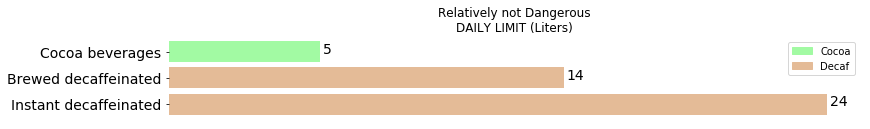

In [12]:
df_prop = df.dropna(subset=['proportion']).copy()
df_prop.sort_values(by='proportion', inplace=True)
df_prop = df_prop[:3]
colr_dic = {'Cocoa':'#A2FAA3','Decaf' :'#E4BB97'}

fig, ax = plt.subplots(1, figsize=(16,3))

color=[colr_dic[row.Category] for i, row in df_prop.iterrows()]
color
barcollection = plt.barh(df_prop['Item'],400/df_prop['proportion'], color=color)
plt.title('Relatively not Dangerous\nDAILY LIMIT (Liters)')
#plt.ylabel('Servings')
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

y = (400/df_prop['proportion'])
for idx, b in enumerate(barcollection):
    plt.text(y[idx:idx+1] + 100, idx -0.05, "{:1}".format(int(y[idx:idx+1]/1000)),fontsize=14)

labels=[row.Item for i, row in df_prop.iterrows()]
plt.yticks(df_prop['Item'],labels=labels, fontsize=14)
ax.get_xaxis().set_ticks([])
handles = [matplotlib.patches.Patch(color=colr_dic[x], label=x) for x in colr_dic.keys()]
plt.legend(handles=handles)

plt.gcf().subplots_adjust(top=0.5)
plt.gcf().subplots_adjust(left=0.3)
plt.savefig('v1.png', edgecolor='none')

### Inoffensive

Some items had a very low concentration and a person would have to drink a ridiculous high amount of those products to  reach the daily limit of caffeine, since this huge difference may offuscate the values of the other products I've separated them from the other values.  
  
Based on this statement:  
"The adequate intakes recommended for total water from all sources each day for most adults between 19 and 30 years of age are:  
  
3.7 liters (or about 130 fl oz) for men  
2.7 liters (about 95 fl oz) for women"  
  
https://www.medicalnewstoday.com/articles/306638.php  
  
  
I set the limit for the 'relatively not dangerous' products at 3.7 liters, its important to mention recommended liquid intake vary according to age, weight, amount of exercice a person practice, temperature where they live, and many other factors. As I'm using averages the viewer must understand that this values are supposed to serve as general refferences and not medical recommendations.

Generaly, you should speak to your doctor every time you're not sure about something. With caffeine is no different, the best way to know your limits is to talk to a doctor and then start experimenting to find the most suited level for you.

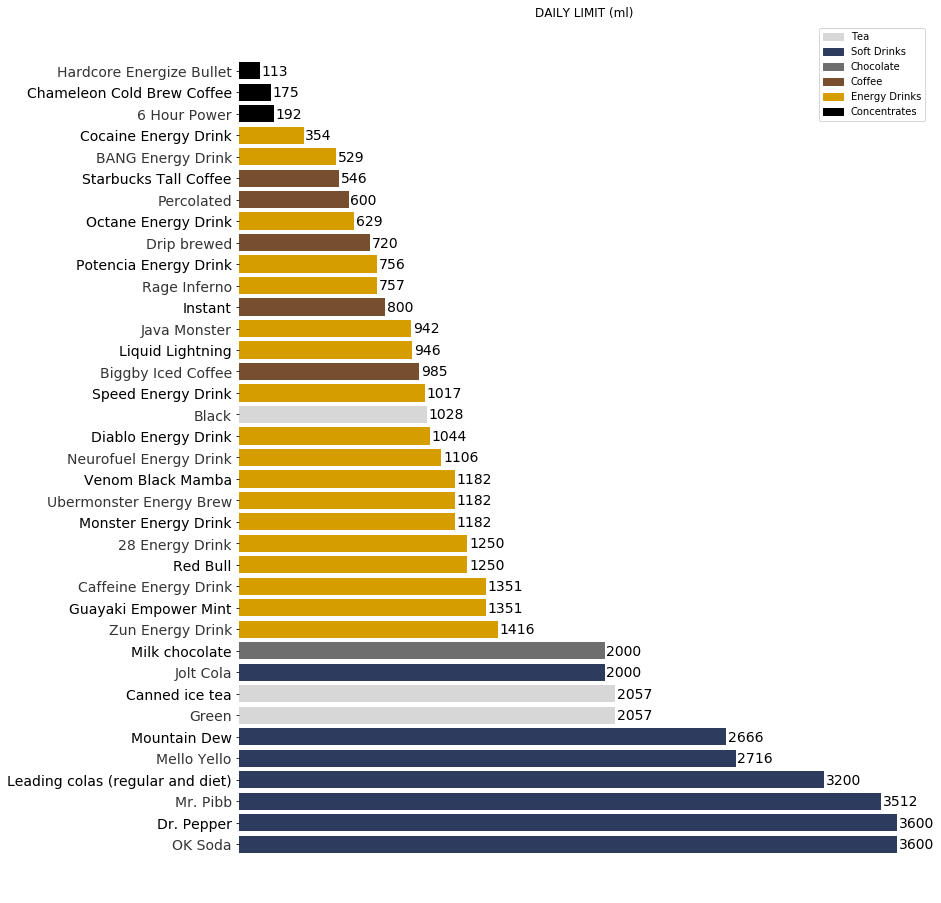

In [13]:
df_prop = df.dropna(subset=['proportion']).copy()
df_prop.sort_values(by='proportion', inplace=True)
df_prop = df_prop[3:]
colr_dic = {'Tea':'#D7D7D7', 'Soft Drinks': '#2C3B5E', 'Chocolate': '#6E6E6E',
            'Coffee': '#774F2E','Energy Drinks':'#D69D00', 'Concentrates': '#000000'}

fig, ax = plt.subplots(1, figsize=(16,16))

color=[colr_dic[row.Category] for i, row in df_prop.iterrows()]
color
barcollection = plt.barh(df_prop['Item'],400/df_prop['proportion'], color=color)
plt.title('DAILY LIMIT (ml)' )
#plt.ylabel('Servings')
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

y = 400/df_prop['proportion']
for idx, b in enumerate(barcollection):  
    plt.text(y[idx:idx+1] + 10, idx -0.20, "{:1}".format(int(y[idx:idx+1])),fontsize=14)

for i, ticklabel in enumerate(plt.gca().get_yticklabels()):
    if i%2==0: ticklabel.set_color('#353535')
        
labels=[row.Item for i, row in df_prop.iterrows()]
plt.yticks(df_prop['Item'],labels=labels, fontsize=14)
ax.get_xaxis().set_ticks([])
handles = [matplotlib.patches.Patch(color=colr_dic[x], label=x) for x in colr_dic.keys()]
plt.legend(handles=handles)

plt.gcf().subplots_adjust(left=0.3)
plt.savefig('v2.png', edgecolor='none')

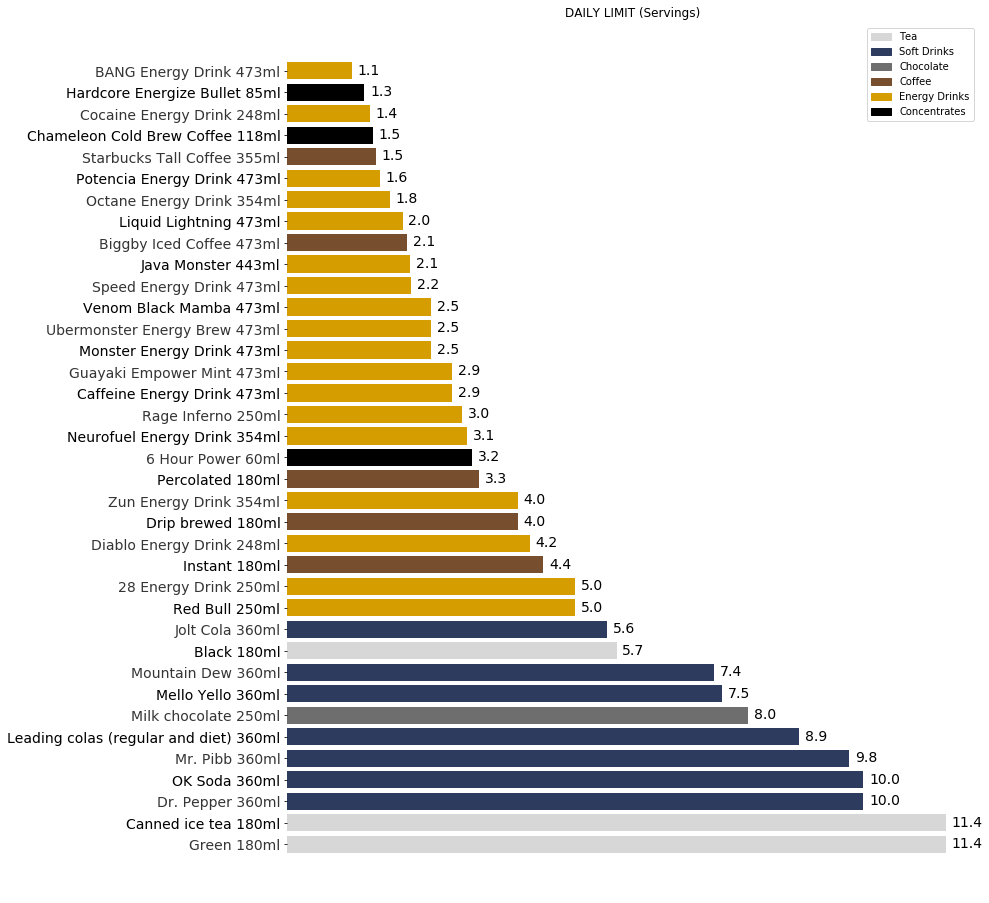

In [14]:
df_prop = df.dropna(subset=['Caffeine per serving (mg)']).copy()
df_prop.sort_values(by='Caffeine per serving (mg)', inplace=True)
df_prop = df_prop[3:]
colr_dic = {'Tea':'#D7D7D7', 'Soft Drinks': '#2C3B5E', 'Chocolate': '#6E6E6E',
            'Coffee': '#774F2E','Energy Drinks':'#D69D00', 'Concentrates': '#000000'}

fig, ax = plt.subplots(1, figsize=(16,16))

color=[colr_dic[row.Category] for i, row in df_prop.iterrows()]
color
barcollection = plt.barh(df_prop['Item'], (400/df_prop['proportion'])/df_prop['Adjusted serving'], color=color)
plt.title('DAILY LIMIT (Servings)')
#plt.ylabel('Servings')
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

y = (400/df_prop['proportion'])/df_prop['Adjusted serving']
for idx, b in enumerate(barcollection):
    plt.text(y[idx:idx+1] + 0.1, idx -0.15, "{:1.1f}".format(float(y[idx:idx+1])),fontsize=14)

labels=[(row.Item +' '+ str(int(row['Adjusted serving']))+ 'ml') for i, row in df_prop.iterrows()]

for i, ticklabel in enumerate(plt.gca().get_yticklabels()):
    if i%2==0: ticklabel.set_color('#353535')
    
plt.yticks(df_prop['Item'],labels=labels,fontsize=14)
ax.get_xaxis().set_ticks([])
handles = [matplotlib.patches.Patch(color=colr_dic[x], label=x) for x in colr_dic.keys()]
plt.legend(handles=handles)

plt.gcf().subplots_adjust(left=0.3)
plt.savefig('v3.png', edgecolor='none')